# Librerias
---
Vamos a utilizar:
1. Numpy: Esta tendra como propocito los vectores y realizar el algebra. Su diminutivo sera **np**
2. Matplotlib.pyplot: Esta tendra como propocito graficar los vectores. Su diminutivo sera **plt**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Variables
---
Las variables que va a dar el usuario son:
1. C: Tamaño de las matricez (Todas las matrices seran CxC) (usuario)
3. coefi: Patron dado (usuario)
4. tK: tipo de K
5. K: Constante elastica de los resortes (usuario)

Las variales que adquirira el sistema:
1. M: es la matriz de masas
2. V: Numero de masas que hay en el patron. Corresponde a len(coefi)
3. Matriz_K: Matriz de las constantes elasticas

In [2]:
C = int(input("Ingrese el tamaño de la matriz: "))
coefi = input("Ingrese el patron separado por comas: ").split(",")
for i in range(len(coefi)):
    coefi[i] = float(coefi[i])
# En el peor de los casos descomenta la siguiente linea y pon coefi tu mismo
#coefi=[np.pi]
V = len(coefi)
print("1) Extremos restringidos \t 2) Extremos libres")
print("3) Extremo izquierdo libre \t 4) Extremo derecho libre")
tK = int(input("Ingrese el caso en el que estamos: "))
K = float(input("Ingrese la constante elastica: "))

Ingrese el tamaño de la matriz: 100
Ingrese el patron separado por comas: 2
1) Extremos restringidos 	 2) Extremos libres
3) Extremo izquierdo libre 	 4) Extremo derecho libre
Ingrese el caso en el que estamos: 1
Ingrese la constante elastica: 1


# Creación de la matriz M
---
Lo que nos interesa es crear una matriz diagonal de masas para esto seguiremos este algoritmo:

1. Se crea una matriz identidad de tamaño CxC
2. Se recorre la matriz y en caso de que estemos en una diagonal (es decir, j==i) colocamos uno de los numeros del patron en orden

In [3]:
M = np.identity(C)
contador = 0
for i in range(C):
    for j in range (C):
        if i==j:
            if contador >= V:
                contador =0
            M[i][j] = coefi[contador]
    contador += 1
print(M)

[[2. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 2.]]


# Creación de la Matriz K
---
Dependiendo del caso que se nos haya dado se construira una de las siguientes matrices:
1. La diagonal principal es 2k y las colindantes -k
2. La diagonal principal es 2k excepto la primear y la ultima entrada que son k y las colindantes a la diagonal -k
3. La diagonal principal es 2k excepto su primera entrada que es k y las colindantes -k
4. La diagonal principal es 2k excepto su ultima entrada que es k y las colindantes -k

In [4]:
Matriz_k = np.identity(C)
for i in range(C):
    for j in range (C):
        if j==i:
            Matriz_k[i][j]=2*K
        elif j==i+1:
            Matriz_k[i][j]=-K
        elif j==i-1:
            Matriz_k[i][j]=-K
match tK:
    case 2:
        Matriz_k[0][0] = K
        Matriz_k[C-1][C-1] = K
    case 3:
        Matriz_k[0][0] = K
    case 4:
        Matriz_k[C-1][C-1] = K
    case _:
        pass
print(Matriz_k)

[[ 2. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [ 0.  0.  0. ...  0. -1.  2.]]


# Invertir Matriz M
---
Lo unico que hacemos en este caso es invertir la matriz M y lo guardamos en la variable **M_inversa**

In [5]:
M_inversa= np.linalg.inv(M)
print(M_inversa)

[[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]


# Creación de la Matriz U
---
En este paso multiplicamos **Matriz_k** con **M_inversa** con el objetivo de crear **U**

In [6]:
U = M_inversa@Matriz_k
print(U)

[[ 1.  -0.5  0.  ...  0.   0.   0. ]
 [-0.5  1.  -0.5 ...  0.   0.   0. ]
 [ 0.  -0.5  1.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  1.  -0.5  0. ]
 [ 0.   0.   0.  ... -0.5  1.  -0.5]
 [ 0.   0.   0.  ...  0.  -0.5  1. ]]


# Conseguimos los Valores propios y los Vectores propios
---
En este paso conseguimos de **U** sus valores y vectores propios

In [7]:
valores, vectores = np.linalg.eig(U)
print(vectores)

[[ 0.00437636  0.00874848  0.01311214 ...  0.12849426 -0.13934326
  -0.13934326]
 [-0.00874848 -0.01746312 -0.02611019 ... -0.10477001 -0.03888104
   0.03888104]
 [ 0.01311214  0.02611019  0.03888104 ... -0.04306823  0.12849426
   0.12849426]
 ...
 [-0.01311214  0.02611019 -0.03888104 ...  0.04306823 -0.12849426
   0.12849426]
 [ 0.00874848 -0.01746312  0.02611019 ...  0.10477001  0.03888104
   0.03888104]
 [-0.00437636  0.00874848 -0.01311214 ... -0.12849426  0.13934326
  -0.13934326]]


# Creamos una lista sorteada de valores propios
---
En este paso se crea una lista sorteada de valores propios con el objetivo de dar orden a los modods normales.

In [8]:
vpo = np.sort(valores)
print(vpo)

[4.83717708e-04 1.93440287e-03 4.35065203e-03 7.73012764e-03
 1.20695603e-02 1.73647518e-02 2.36105794e-02 3.08010008e-02
 3.89290596e-02 4.79868925e-02 5.79657365e-02 6.88559379e-02
 8.06469610e-02 9.33273988e-02 1.06884984e-01 1.21306600e-01
 1.36578295e-01 1.52685295e-01 1.69612017e-01 1.87342086e-01
 2.05858349e-01 2.25142893e-01 2.45177061e-01 2.65941471e-01
 2.87416036e-01 3.09579979e-01 3.32411860e-01 3.55889589e-01
 3.79990453e-01 4.04691136e-01 4.29967742e-01 4.55795817e-01
 4.82150375e-01 5.09005919e-01 5.36336468e-01 5.64115582e-01
 5.92316385e-01 6.20911596e-01 6.49873551e-01 6.79174230e-01
 7.08785288e-01 7.38678077e-01 7.68823678e-01 7.99192927e-01
 8.29756444e-01 8.60484661e-01 8.91347850e-01 9.22316153e-01
 9.53359610e-01 9.84448188e-01 1.01555181e+00 1.04664039e+00
 1.07768385e+00 1.10865215e+00 1.13951534e+00 1.17024356e+00
 1.20080707e+00 1.23117632e+00 1.26132192e+00 1.29121471e+00
 1.32082577e+00 1.35012645e+00 1.37908840e+00 1.40768361e+00
 1.43588442e+00 1.463663

# Interacción con el Usuario
---
Esta sección tiene como objetivo permitirle al usuario graficar cualquier modo normal que le interese

Ingrese el modo normal que le interesa: 99


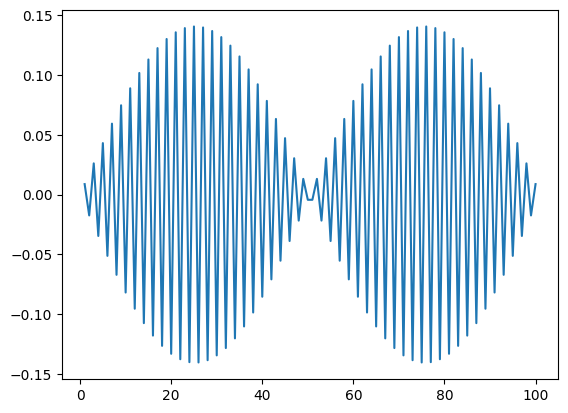

In [9]:
n = 0
meta = int(input("Ingrese el modo normal que le interesa: "))
while valores[n] != vpo[meta-1]:
    n += 1
plt.plot(range(1,len(vectores[:,n])+1),vectores[:,n])
plt.show()

# Comprobación

In [10]:
prueba_1 = U@vectores[:,n]
prueba_2 = valores[n]*vectores[:,n]
for i in range(C):
    if np.round(prueba_1[i],5) == np.round(prueba_2[i],5):
        print(i,"Yeii")

0 Yeii
1 Yeii
2 Yeii
3 Yeii
4 Yeii
5 Yeii
6 Yeii
7 Yeii
8 Yeii
9 Yeii
10 Yeii
11 Yeii
12 Yeii
13 Yeii
14 Yeii
15 Yeii
16 Yeii
17 Yeii
18 Yeii
19 Yeii
20 Yeii
21 Yeii
22 Yeii
23 Yeii
24 Yeii
25 Yeii
26 Yeii
27 Yeii
28 Yeii
29 Yeii
30 Yeii
31 Yeii
32 Yeii
33 Yeii
34 Yeii
35 Yeii
36 Yeii
37 Yeii
38 Yeii
39 Yeii
40 Yeii
41 Yeii
42 Yeii
43 Yeii
44 Yeii
45 Yeii
46 Yeii
47 Yeii
48 Yeii
49 Yeii
50 Yeii
51 Yeii
52 Yeii
53 Yeii
54 Yeii
55 Yeii
56 Yeii
57 Yeii
58 Yeii
59 Yeii
60 Yeii
61 Yeii
62 Yeii
63 Yeii
64 Yeii
65 Yeii
66 Yeii
67 Yeii
68 Yeii
69 Yeii
70 Yeii
71 Yeii
72 Yeii
73 Yeii
74 Yeii
75 Yeii
76 Yeii
77 Yeii
78 Yeii
79 Yeii
80 Yeii
81 Yeii
82 Yeii
83 Yeii
84 Yeii
85 Yeii
86 Yeii
87 Yeii
88 Yeii
89 Yeii
90 Yeii
91 Yeii
92 Yeii
93 Yeii
94 Yeii
95 Yeii
96 Yeii
97 Yeii
98 Yeii
99 Yeii


In [11]:
coefiB = input("Ingrese el patron separado por comas: ").split(",")
for i in range(len(coefiB)):
    coefiB[i] = float(coefiB[i])
# En el peor de los casos descomenta la siguiente linea y pon coefi tu mismo
#coefiB=[1,3]
VB = len(coefiB)
KB = float(input("Ingrese la constante elastica: "))

Ingrese el patron separado por comas: 1,3
Ingrese la constante elastica: 1


In [12]:
MB = np.identity(C)
contador = 0
for i in range(C):
    for j in range (C):
        if i==j:
            if contador >= VB:
                contador =0
            MB[i][j] = coefiB[contador]
    contador += 1
print(MB)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 3. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 3. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 3.]]


In [13]:
Matriz_kB = np.identity(C)
for i in range(C):
    for j in range (C):
        if j==i:
            Matriz_kB[i][j]=2*KB
        elif j==i+1:
            Matriz_kB[i][j]=-KB
        elif j==i-1:
            Matriz_kB[i][j]=-KB

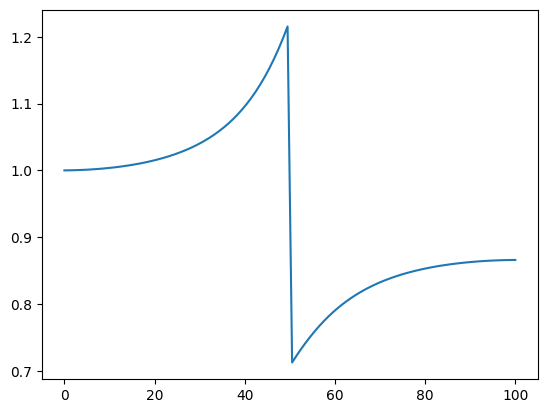

In [14]:
x = np.linspace(0,100,100)
M_inversaB= np.linalg.inv(MB)
UB = M_inversaB@Matriz_kB
valoresB, vectoresB = np.linalg.eig(UB)
vpoB = np.sort(valoresB)
plt.plot(x,np.sqrt(vpo/vpoB))
plt.show()

Ingrese el modo normal que le interesa: 99


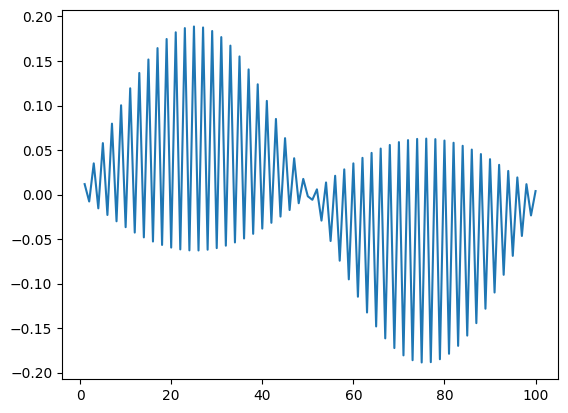

In [15]:
n = 0
meta = int(input("Ingrese el modo normal que le interesa: "))
while valoresB[n] != vpoB[meta-1]:
    n += 1
plt.plot(range(1,len(vectoresB[:,n])+1),vectoresB[:,n])
plt.show()